### Importation de librairies

In [139]:
from qiskit import *
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_state_city

### Création du circuit

In [129]:
circ = QuantumCircuit(3, 3)

<b>Qbit 0</b> : Gardien de droite
<b>Qbit 1</b> : Gardien de gauche
<b>Qbit 2</b> : Ligne de Mensonge

### Création de portes

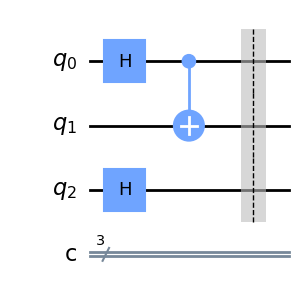

In [130]:
circ.h(0)
circ.h(2)
circ.cx(0,1)
circ.barrier(range(3))
circ.draw('mpl')

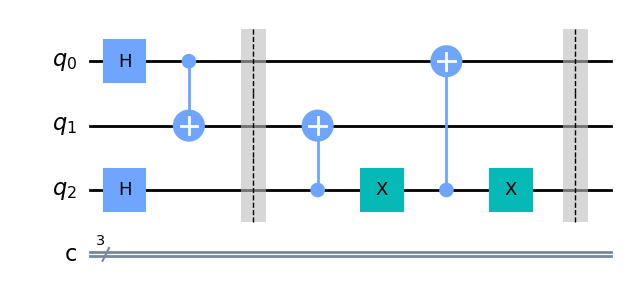

In [131]:
circ.cx(2,1)
circ.x(2)
circ.cx(2,0)
circ.x(2)
circ.barrier(range(3))
circ.draw('mpl')

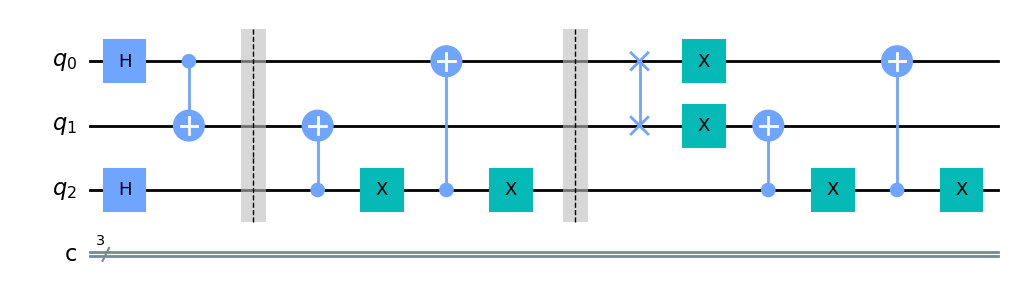

In [132]:
circ.swap(0,1)
circ.x(0)
circ.x(1)
circ.cx(2,1)
circ.x(2)
circ.cx(2,0)
circ.x(2)
#circ.barrier(range(3))
circ.draw('mpl')

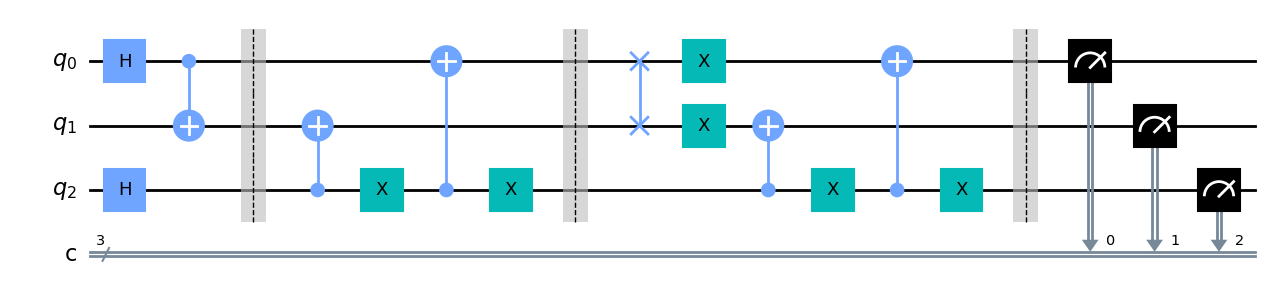

In [133]:
circ.barrier(range(3))

# Map the quantum measurement to the classical bits
circ.measure(range(3), range(3))

#drawing the circuit
circ.draw('mpl')

### Définicion du simulateur à utiliser

In [140]:
backend = AerSimulator()

In [134]:
# First we have to transpile the quantum circuit to the low-level QASM instructions used by the backend
compiled = transpile(circ, backend)

# Execute the circuit on the qasm simulator. We've set the number of repeats of the circuit to be 1024, which is the default.
simulator = backend.run(compiled, shots=1024)

# Grab the results from the job.
result = simulator.result()

In [135]:
counts = result.get_counts(compiled)
print(counts)

{'011': 259, '111': 270, '000': 239, '100': 256}
